In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import exposure

import os
from tqdm import tqdm
import pickle

import imutils
from imutils.contours import sort_contours
from random import randint

In [3]:
# function to order points to proper rectangle
def order_points(pts):
  # initialzie a list of coordinates that will be ordered
  # such that the first entry in the list is the top-left,
  # the second entry is the top-right, the third is the
  # bottom-right, and the fourth is the bottom-left
  rect = np.zeros((4, 2), dtype="float32")

  # the top-left point will have the smallest sum, whereas
  # the bottom-right point will have the largest sum
  s = pts.sum(axis=1)
  rect[0] = pts[np.argmin(s)]
  rect[2] = pts[np.argmax(s)]

  # now, compute the difference between the points, the
  # top-right point will have the smallest difference,
  # whereas the bottom-left will have the largest difference
  diff = np.diff(pts, axis=1)
  rect[1] = pts[np.argmin(diff)]
  rect[3] = pts[np.argmax(diff)]

  # return the ordered coordinates
  return rect

In [4]:
path = './Kelompok 6'
# menampung array untuk gambar
plates = [cv.imread(os.path.join(path, "3D_2141720105_1 - SYAIKHUL SHAFWAN R.jpeg"))]

lst = os.listdir(path)
lst.sort()
for img in tqdm(lst):  # kita ambil semua isi dalam folder
  try:
    img_array = cv.imread(os.path.join(path, img))  # kita baca image nya
    plates.append(img_array)
  except Exception as e:
    pass

 13%|█▎        | 2/15 [00:00<00:00, 19.43it/s]

100%|██████████| 15/15 [00:01<00:00, 12.89it/s]


In [6]:
def toRGB(img):
  return cv.cvtColor(img, cv.COLOR_BGR2RGB)

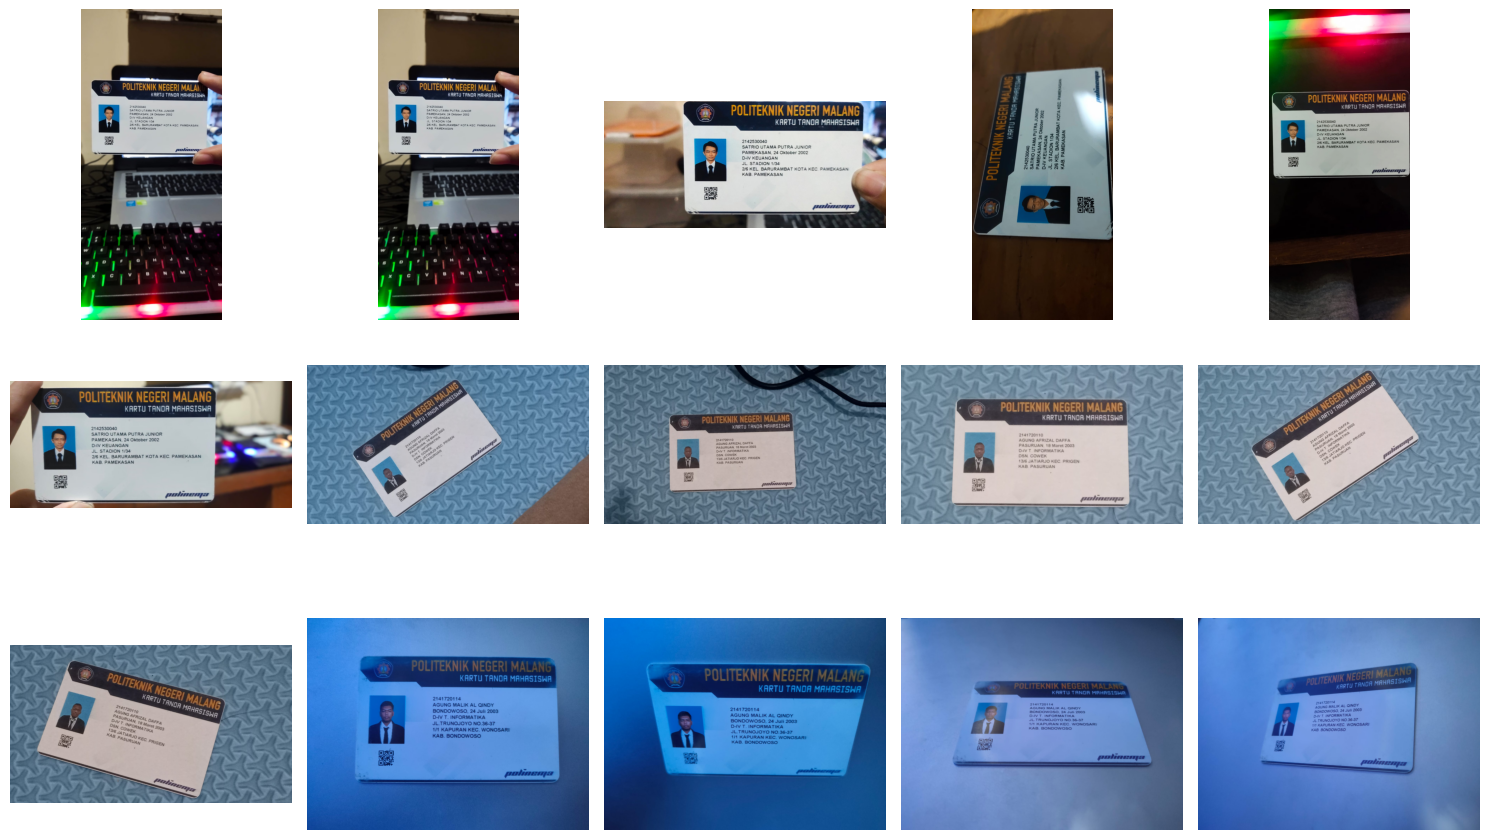

In [7]:
# Inisialisasi subplots dengan 3 baris dan 5 kolom
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

# Iterasi melalui setiap sumbu dan gambar
for ax, image_path in zip(axes.flatten(), plates):
    # Tampilkan gambar pada sumbu
    ax.imshow(toRGB(image_path))

    # Hilangkan sumbu pada tampilan gambar
    ax.axis('off')

# Sesuaikan tata letak subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

In [ ]:
# function to transform image to four points
def four_point_transform(image, pts):
  # obtain a consistent order of the points and unpack them
  # individually
  rect = order_points(pts)

  # # multiply the rectangle by the original ratio
  # rect *= ratio

  (tl, tr, br, bl) = rect

  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
      [0, 0],
      [maxWidth - 1, 0],
      [maxWidth - 1, maxHeight - 1],
      [0, maxHeight - 1]], dtype="float32")

  # compute the perspective transform matrix and then apply it
  M = cv.getPerspectiveTransform(rect, dst)
  warped = cv.warpPerspective(image, M, (maxWidth, maxHeight))

  # return the warped image
  return warped

In [ ]:
# function to find two largest countours which ones are may be
#  full image and our rectangle edged object
def findLargestCountours(cntList, cntWidths):
  newCntList = []
  newCntWidths = []

  # finding 1st largest rectangle
  first_largest_cnt_pos = cntWidths.index(max(cntWidths))

  # adding it in new
  newCntList.append(cntList[first_largest_cnt_pos])
  newCntWidths.append(cntWidths[first_largest_cnt_pos])

  # removing it from old
  cntList.pop(first_largest_cnt_pos)
  cntWidths.pop(first_largest_cnt_pos)

  # finding second largest rectangle
  seccond_largest_cnt_pos = cntWidths.index(max(cntWidths))

  # adding it in new
  newCntList.append(cntList[seccond_largest_cnt_pos])
  newCntWidths.append(cntWidths[seccond_largest_cnt_pos])

  # removing it from old
  cntList.pop(seccond_largest_cnt_pos)
  cntWidths.pop(seccond_largest_cnt_pos)

  print('Old Screen Dimentions filtered', cntWidths)
  print('Screen Dimentions filtered', newCntWidths)
  return newCntList, newCntWidths

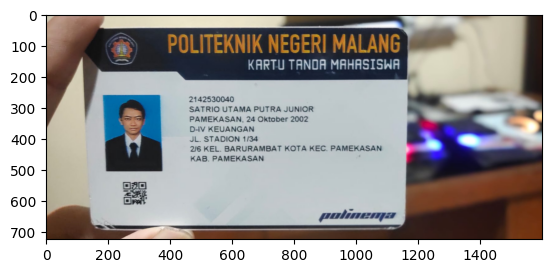

In [ ]:
imgKTM = cv.imread('./Kelompok 6/3D_2141720105_5 - SYAIKHUL SHAFWAN R.jpeg')

# w, h, c = imgKTM.shape
# width, height = w * 0.4, h * 0.4
# imgKTM = cv.resize(imgKTM, (int(height), int(width)))

plt.imshow(toRGB(imgKTM))
plt.show()

In [ ]:
def adjust_contrast_brightness(img, contrast, brightness):
    brightness += int(round(255*(1-contrast)/2))
    return cv.addWeighted(img, contrast, img, 0, brightness)

In [ ]:
def cv2_imshow(img, title='Image', size=None):
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  if size is not None:
    plt.figure(figsize=size)
  plt.imshow(img)
  plt.title(title)
  plt.show()

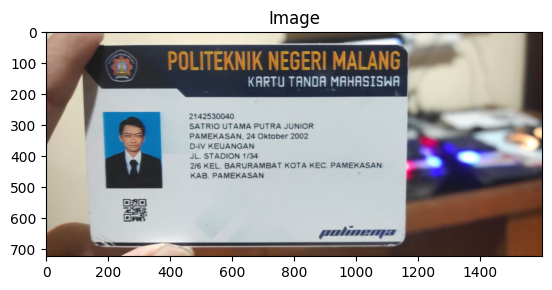

In [ ]:
img = adjust_contrast_brightness(imgKTM, 1, 10)
cv2_imshow(img)

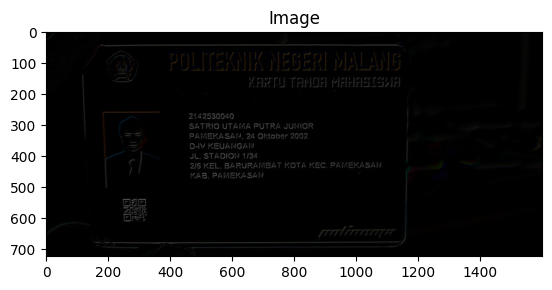

In [ ]:
kernel = np.ones((4, 4))
outputImg = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
cv2_imshow(outputImg)

In [ ]:
def detect_contour(edged):
  contours, _ = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  contours = sorted(contours, key=cv.contourArea, reverse=True)
  return max(contours, key=cv.contourArea)

In [ ]:
def reflection(img):
  hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  h, s, v = cv.split(hsv_image)

  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  v = clahe.apply(v)

  hsv_image = cv.merge([h, s, v])
  return cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

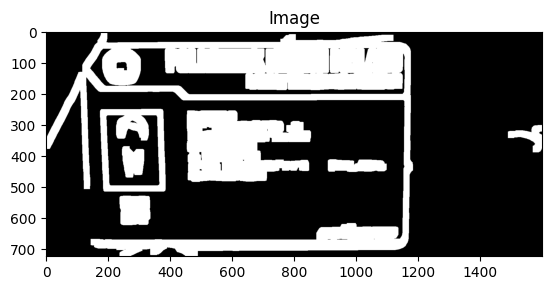

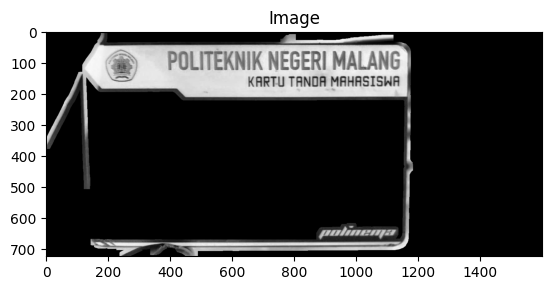

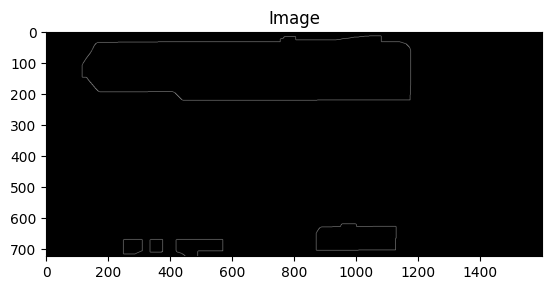

In [ ]:
image = imgKTM.copy()

image = reflection(image)
inverted_img = cv.bitwise_not(image)
gray = cv.cvtColor(inverted_img, cv.COLOR_BGR2GRAY)
gray1 = cv.bilateralFilter(gray.copy(), 11, 17, 17)
gray1 = cv.medianBlur(gray1, 9)
edged = cv.Canny(gray1, 10, 300)
# cv2_imshow(edged)
edged = cv.dilate(edged, np.ones((20, 20), dtype=np.int8))
cv2_imshow(edged)

largest_contour = detect_contour(edged)
# Buat mask untuk menandai area dalam kontur
mask = np.zeros_like(gray)

# Gambar kontur pada mask
cv.drawContours(mask, [largest_contour], -1, (255, 0, 0), thickness=cv.FILLED)
mask = cv.bitwise_not(mask)
# Ubah warna dalam area kontur
gray[mask != 0] = 0
cv2_imshow(gray)

thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)[1]
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, np.ones((37, 37), dtype=np.int8))
edged = cv.Canny(opening, 60, 400)
cv2_imshow(edged)

length of countours  7


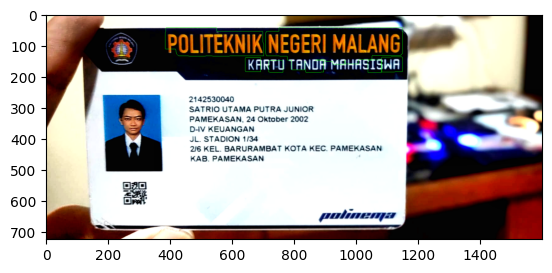

In [ ]:
countours, hierarcy = cv.findContours(
    edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print('length of countours ', len(countours))
imageCopy = image.copy()

cv.drawContours(imageCopy, countours, -1, (0, 255, 0), 1)

plt.imshow(toRGB(imageCopy))
plt.show()

In [ ]:
# approximate the contour
cnts = sorted(countours, key=cv.contourArea, reverse=True)
screenCntList = []
scrWidths = []
for cnt in cnts:
  peri = cv.arcLength(cnt, True)
  approx = cv.approxPolyDP(cnt, 0.05 * peri, True)
  screenCnt = approx
  print(len(approx))

  if (len(screenCnt) == 4):
    (X, Y, W, H) = cv.boundingRect(cnt)
    print('X Y W H', cnt)
    screenCntList.append(screenCnt)
    scrWidths.append(W)

  # else:
  #     print("4 points not found")

print('Screens found :', len(screenCntList))
print('Screen Dimentions', scrWidths)

4
X Y W H [[[388  43]]

 [[386  45]]

 [[386  56]]

 [[385  57]]

 [[385  58]]

 [[384  59]]

 [[384 111]]

 [[385 112]]

 [[417 112]]

 [[418 113]]

 [[418 116]]

 [[419 117]]

 [[419 122]]

 [[420 123]]

 [[420 126]]

 [[421 127]]

 [[421 128]]

 [[426 133]]

 [[427 133]]

 [[428 134]]

 [[459 134]]

 [[460 135]]

 [[514 135]]

 [[515 134]]

 [[536 134]]

 [[537 135]]

 [[591 135]]

 [[592 134]]

 [[702 134]]

 [[702  96]]

 [[701  95]]

 [[701  93]]

 [[700  92]]

 [[700  91]]

 [[699  90]]

 [[699  56]]

 [[698  55]]

 [[551  55]]

 [[550  54]]

 [[550  44]]

 [[549  43]]]
4
X Y W H [[[645 139]]

 [[644 140]]

 [[643 140]]

 [[643 141]]

 [[642 142]]

 [[642 182]]

 [[643 183]]

 [[643 184]]

 [[644 185]]

 [[692 185]]

 [[692 140]]

 [[691 139]]]
4
X Y W H [[[720 149]]

 [[718 151]]

 [[718 185]]

 [[719 186]]

 [[721 186]]

 [[722 187]]

 [[764 187]]

 [[764 150]]

 [[763 149]]]
2
8
6
8
Screens found : 3
Screen Dimentions [319, 51, 47]


Old Screen Dimentions filtered [47]
Screen Dimentions filtered [319, 51]
Mismatch in rect


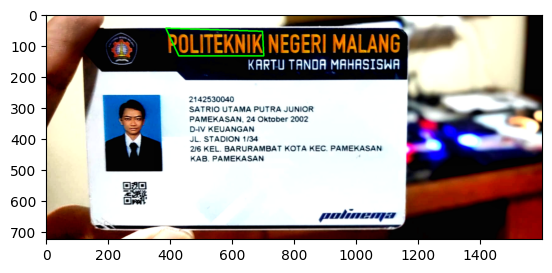

In [ ]:
if(len(screenCntList) >= 2):
  screenCntList, scrWidths = findLargestCountours(screenCntList, scrWidths)

if not len(screenCntList) >= 2:  # there is no rectangle found
  print('No rectangle found')
elif scrWidths[0] != scrWidths[1]:  # mismatch in rect
  print('Mismatch in rect')

plt.imshow(toRGB(cv.drawContours(image.copy(), [screenCntList[0]], -1, (0, 255, 0), 3)))
plt.show()

In [ ]:
pts = screenCntList[0].reshape(4, 2)
print('Found bill rectagle at ', pts)

Found bill rectagle at  [[386  45]
 [428 134]
 [702 134]
 [698  55]]


[[386.  45.]
 [698.  55.]
 [702. 134.]
 [428. 134.]]


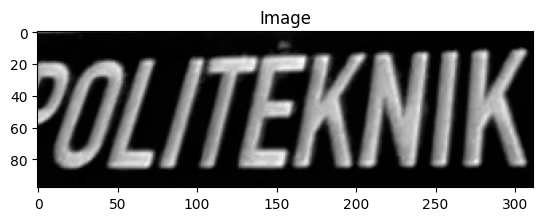

In [ ]:
rect = order_points(pts)
print(rect)

# apply the four point tranform to obtain a "birds eye view" of
# the image
warped = four_point_transform(image, pts)

# convert the warped image to grayscale and then adjust
# the intensity of the pixels to have minimum and maximum
# values of 0 and 255, respectively
warp = cv.cvtColor(warped, cv.COLOR_BGR2GRAY)
warp = exposure.rescale_intensity(warp)

img_asli = warped.copy()
cv2_imshow(warp)

In [ ]:
# Define function for contour detection
def find_contours(img):
  conts = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

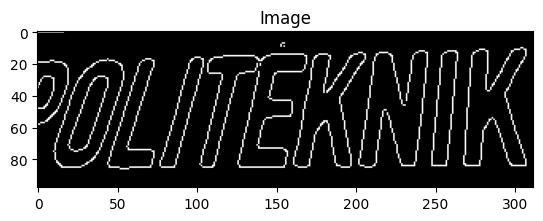

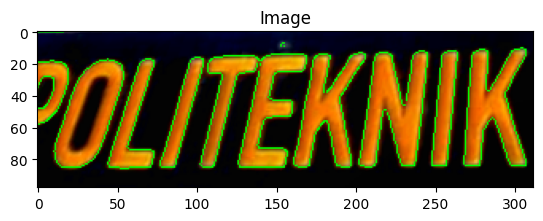

In [ ]:
otsu = cv.threshold(warp, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
otsu = cv.bitwise_not(otsu)

canny = cv.Canny(otsu, 30, 400)
cv2_imshow(canny)

contours = find_contours(canny.copy())
cv.drawContours(warped, contours, -1, (0, 255, 0), 1)
cv2_imshow(warped)

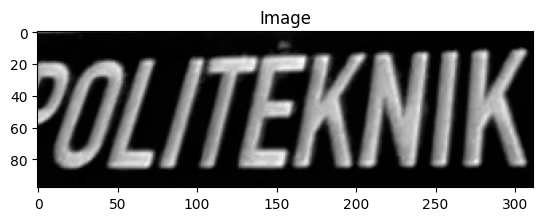

In [ ]:
min_w, max_w = 8, 160
min_h, max_h = 14, 140
num = 0
for c in contours:
  (x, y, w, h) = cv.boundingRect(c)  # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    roi = img_asli[y:y+h, x:x+w]  # get region of interest for char
    # thresh = cv.threshold(roi, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    # cv2_imshow(roi, size=(0.6,0.5))  # check
    # cv.imwrite(f'./dataset/char_{num}.jpg', roi)  # save char
    num += 1
    # Build bounding box on original image
    # cv.rectangle(warp, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show bounding box on original image
cv2_imshow(warp)